# Exercícios

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='50%' style="display: block; margin: 30px auto">

# 1)
Descreva as seguintes variáveis abaixo como  qualitativa nominal/ordinal ou quantitativa discreta/contínua:

a) ocorrência de hipertensão pré-natal em grávidas com mais de 35 anos (sim ou não)

b) intenção de voto para presidente (as possíveis escolhas são os `nomes` dos presidentes e não sei)

c) Perda de peso de maratonistas na corrida de São Silvestre (em quilos)

d) intensidade da perda de peso de maratonistas na corrida de São Silvestre (leve, moderada, forte)

e) Grau de satisfação da população brasileira com relação ao trabalho de seu presidente (valores de 0-5 , com zero indicando totalmente insatisfeito, e 5 totalmente satisfeito)

a) Qualitativo nominal

b) Qualitativo nominal

c) Quantitativo contínua

d) Qualitativo ordinal

e) Qualitativo ordinal (grau de satisfação - insatisfeito, etc) /  Quantitativo discreto (numérico de 0 a 5)



# 2)
Com os dados do titanic, fazer uma análise completa das variáveis

In [3]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- média, mediana, moda, simetria

In [14]:
# age = quanitativa discreta
# fare = quantitiva contínua

print(df['age'].mean())

print(df['fare'].mean())

print(df['age'].median())

print(df['fare'].median())

print(df['age'].mode())

print(df['fare'].mode())


29.69911764705882
32.2042079685746
28.0
14.4542
0    24.0
dtype: float64
0    8.05
dtype: float64


Média é bem sensivel à valores extremos (outliers), enquanto que a mediana não é.   
0 na moda significa que é a primeira moda

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

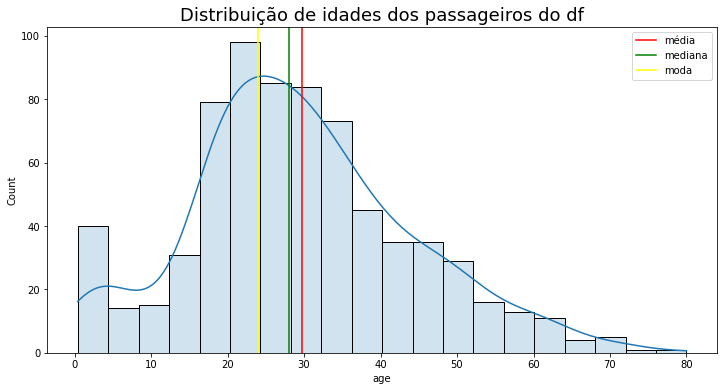

In [17]:
# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Define o Titulo
plt.title("Distribuição de idades dos passageiros do df", size=18)

# Plot do Histograma
sns.histplot(df["age"], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=df["age"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df["age"].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df["age"].mode().shape[0]):
    plt.axvline(df["age"].mode()[i], color="yellow", label="moda")

# Cria uma legenda
plt.legend()

# Mostra o Gráfico
plt.show()

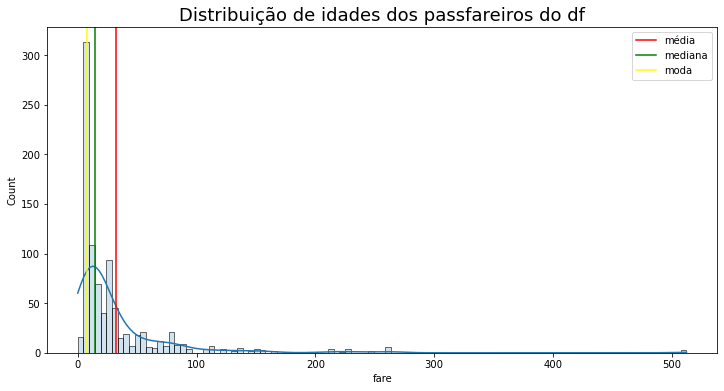

In [18]:
# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Define o Titulo
plt.title("Distribuição de idades dos passfareiros do df", size=18)

# Plot do Histograma
sns.histplot(df["fare"], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=df["fare"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(df["fare"].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(df["fare"].mode().shape[0]):
    plt.axvline(df["fare"].mode()[i], color="yellow", label="moda")

# Cria uma legenda
plt.legend()

# Mostra o Gráfico
plt.show()

A idade e tarifa tem assimetria à direita

In [19]:
df['age'].skew()

0.38910778230082704

In [20]:
df['fare'].skew()

4.787316519674893

- Amplitude, mínimo, máximo, variância, desvio padrão

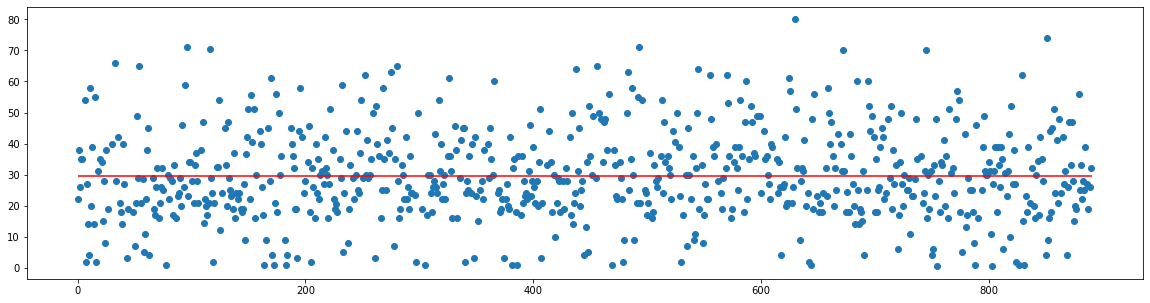

In [26]:
plt.figure(figsize=(20,5))
plt.scatter(range(df.shape[0]), df['age'])
plt.hlines(df['age'].mean(), xmin=0, xmax=df.shape[0], color='red')

In [24]:
print(df['age'].min())
print(df['age'].max())
print(df['age'].max() - df['age'].min()) # amplitude

print(df['age'].var())
print(df['age'].std())

0.42
80.0
79.58
211.0191247463081
14.526497332334044


In [25]:
print(df['fare'].min())
print(df['fare'].max())
print(df['fare'].max() - df['fare'].min()) # amplitude

print(df['fare'].var())
print(df['fare'].std())

0.0
512.3292
512.3292
2469.436845743117
49.693428597180905


- Quartil, decil, percentil, boxplot

In [29]:
df['age'].quantile([0.25,0.5,0.75]) # quartis

0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64

In [30]:
df['age'].quantile([i/10 for i in range(1,10)]) #decil

0.1    14.0
0.2    19.0
0.3    22.0
0.4    25.0
0.5    28.0
0.6    31.8
0.7    36.0
0.8    41.0
0.9    50.0
Name: age, dtype: float64

In [31]:
df['age'].quantile([i/100 for i in range(1,100)]) #percentil

0.01     1.00
0.02     2.00
0.03     2.00
0.04     3.00
0.05     4.00
        ...  
0.95    56.00
0.96    58.00
0.97    60.61
0.98    62.74
0.99    65.87
Name: age, Length: 99, dtype: float64

<AxesSubplot:xlabel='age'>

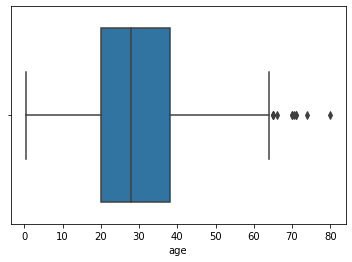

In [33]:
sns.boxplot(data=df, x='age')

- tabelas de frequência para dados qualitativos e quantitativos

In [36]:
# dados qualitativos
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [37]:
df['sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: sex, dtype: float64

In [38]:
df['sex'].value_counts(normalize=True)*100

male      64.758698
female    35.241302
Name: sex, dtype: float64

In [45]:
df_freq = pd.DataFrame({'Freq':df['sex'].value_counts(), 'Freq relativa':df['sex'].value_counts(normalize=True), 'Freq relativa percentual':df['sex'].value_counts(normalize=True)*100})
df_freq

,Freq,Freq relativa,Freq relativa percentual
male,577,0.647587,64.758698
female,314,0.352413,35.241302


Também é conhecida tabela de dupla entrada ou contingência

<AxesSubplot:xlabel='sex', ylabel='Count'>

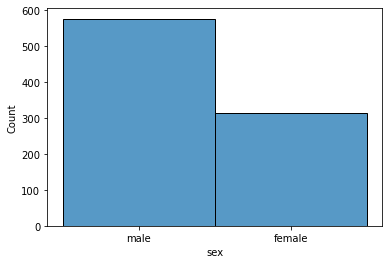

In [47]:
# Visualizando graficamente
sns.histplot(df['sex'])

<AxesSubplot:xlabel='sex', ylabel='Probability'>

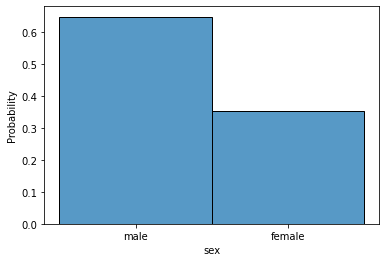

In [48]:
sns.histplot(df['sex'], stat='probability')

In [51]:
# Para dados quantitativos 
df['age'].value_counts().sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: age, Length: 88, dtype: int64

In [52]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

vamos trabalhar com intervalos?

Definindo um número de classes

Regra de Sturges

$$k = 1 + \frac{10}{3}\log_{10}n$$

- $k$: quantidade de classes
- $n$: quantidade de elementos da minha amostra

In [54]:
n = len(df['age'])
n

891

In [55]:
k = 1 + (10/3)* np.log10(n)
k

10.832925680122917

In [56]:
k = int(round(k))
k

11

0 - 10   
10 - 20   
20 - 30 
..

In [58]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [61]:
pd.cut(df['age'], bins=k)

0      (14.889, 22.124]
1      (36.593, 43.827]
2      (22.124, 29.358]
3      (29.358, 36.593]
4      (29.358, 36.593]
             ...       
886    (22.124, 29.358]
887    (14.889, 22.124]
888                 NaN
889    (22.124, 29.358]
890    (29.358, 36.593]
Name: age, Length: 891, dtype: category
Categories (11, interval[float64, right]): [(0.34, 7.655] < (7.655, 14.889] < (14.889, 22.124] < (22.124, 29.358] ... (51.062, 58.296] < (58.296, 65.531] < (65.531, 72.765] < (72.765, 80.0]]

In [66]:
pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], include_lowest=True)

0      (20.0, 30.0]
1      (30.0, 40.0]
2      (20.0, 30.0]
3      (30.0, 40.0]
4      (30.0, 40.0]
           ...     
886    (20.0, 30.0]
887    (10.0, 20.0]
888             NaN
889    (20.0, 30.0]
890    (30.0, 40.0]
Name: age, Length: 891, dtype: category
Categories (8, interval[float64, right]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0]]

In [73]:
pd.value_counts(pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], include_lowest=True)).sort_index()

(-0.001, 10.0]     64
(10.0, 20.0]      115
(20.0, 30.0]      230
(30.0, 40.0]      155
(40.0, 50.0]       86
(50.0, 60.0]       42
(60.0, 70.0]       17
(70.0, 80.0]        5
Name: age, dtype: int64

In [77]:
pd.value_counts(pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], include_lowest=True), normalize=True).sort_index()

(-0.001, 10.0]    0.089636
(10.0, 20.0]      0.161064
(20.0, 30.0]      0.322129
(30.0, 40.0]      0.217087
(40.0, 50.0]      0.120448
(50.0, 60.0]      0.058824
(60.0, 70.0]      0.023810
(70.0, 80.0]      0.007003
Name: age, dtype: float64

In [79]:
pd.value_counts(pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], include_lowest=True), normalize=True).sort_index()*100

(-0.001, 10.0]     8.963585
(10.0, 20.0]      16.106443
(20.0, 30.0]      32.212885
(30.0, 40.0]      21.708683
(40.0, 50.0]      12.044818
(50.0, 60.0]       5.882353
(60.0, 70.0]       2.380952
(70.0, 80.0]       0.700280
Name: age, dtype: float64

In [72]:
# alternativa df['age'].value_counts(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80]).sort_index()

In [80]:
df_freq = pd.DataFrame({
    'Freq':
    pd.value_counts(pd.cut(df['age'], bins=[
                    0, 10, 20, 30, 40, 50, 60, 70, 80], include_lowest=True)).sort_index(),
    'Freq relativa':
    pd.value_counts(pd.cut(df['age'], bins=[
                    0, 10, 20, 30, 40, 50, 60, 70, 80], include_lowest=True), normalize=True).sort_index(),
    'Freq relativa percentual':
    pd.value_counts(pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60,
                                            70, 80], include_lowest=True), normalize=True).sort_index()*100
})
df_freq

,Freq,Freq relativa,Freq relativa percentual
"(-0.001, 10.0]",64,0.089636,8.963585
"(10.0, 20.0]",115,0.161064,16.106443
"(20.0, 30.0]",230,0.322129,32.212885
"(30.0, 40.0]",155,0.217087,21.708683
"(40.0, 50.0]",86,0.120448,12.044818
"(50.0, 60.0]",42,0.058824,5.882353
"(60.0, 70.0]",17,0.023810,2.380952
"(70.0, 80.0]",5,0.007003,0.700280


# 3)
Um teste para COVID-19 possui uma taxa de 5% de falso positivo e 1% de falso negativo, ou seja, em 5% dos não-infectados acusa como infectados, e em 1% dos infectados acusa como não infectados. Sabendo que atualmente 1% da população está infectada, calcule a probabilidade de um paciente cujo teste apontou positivo estar realmente infectado.

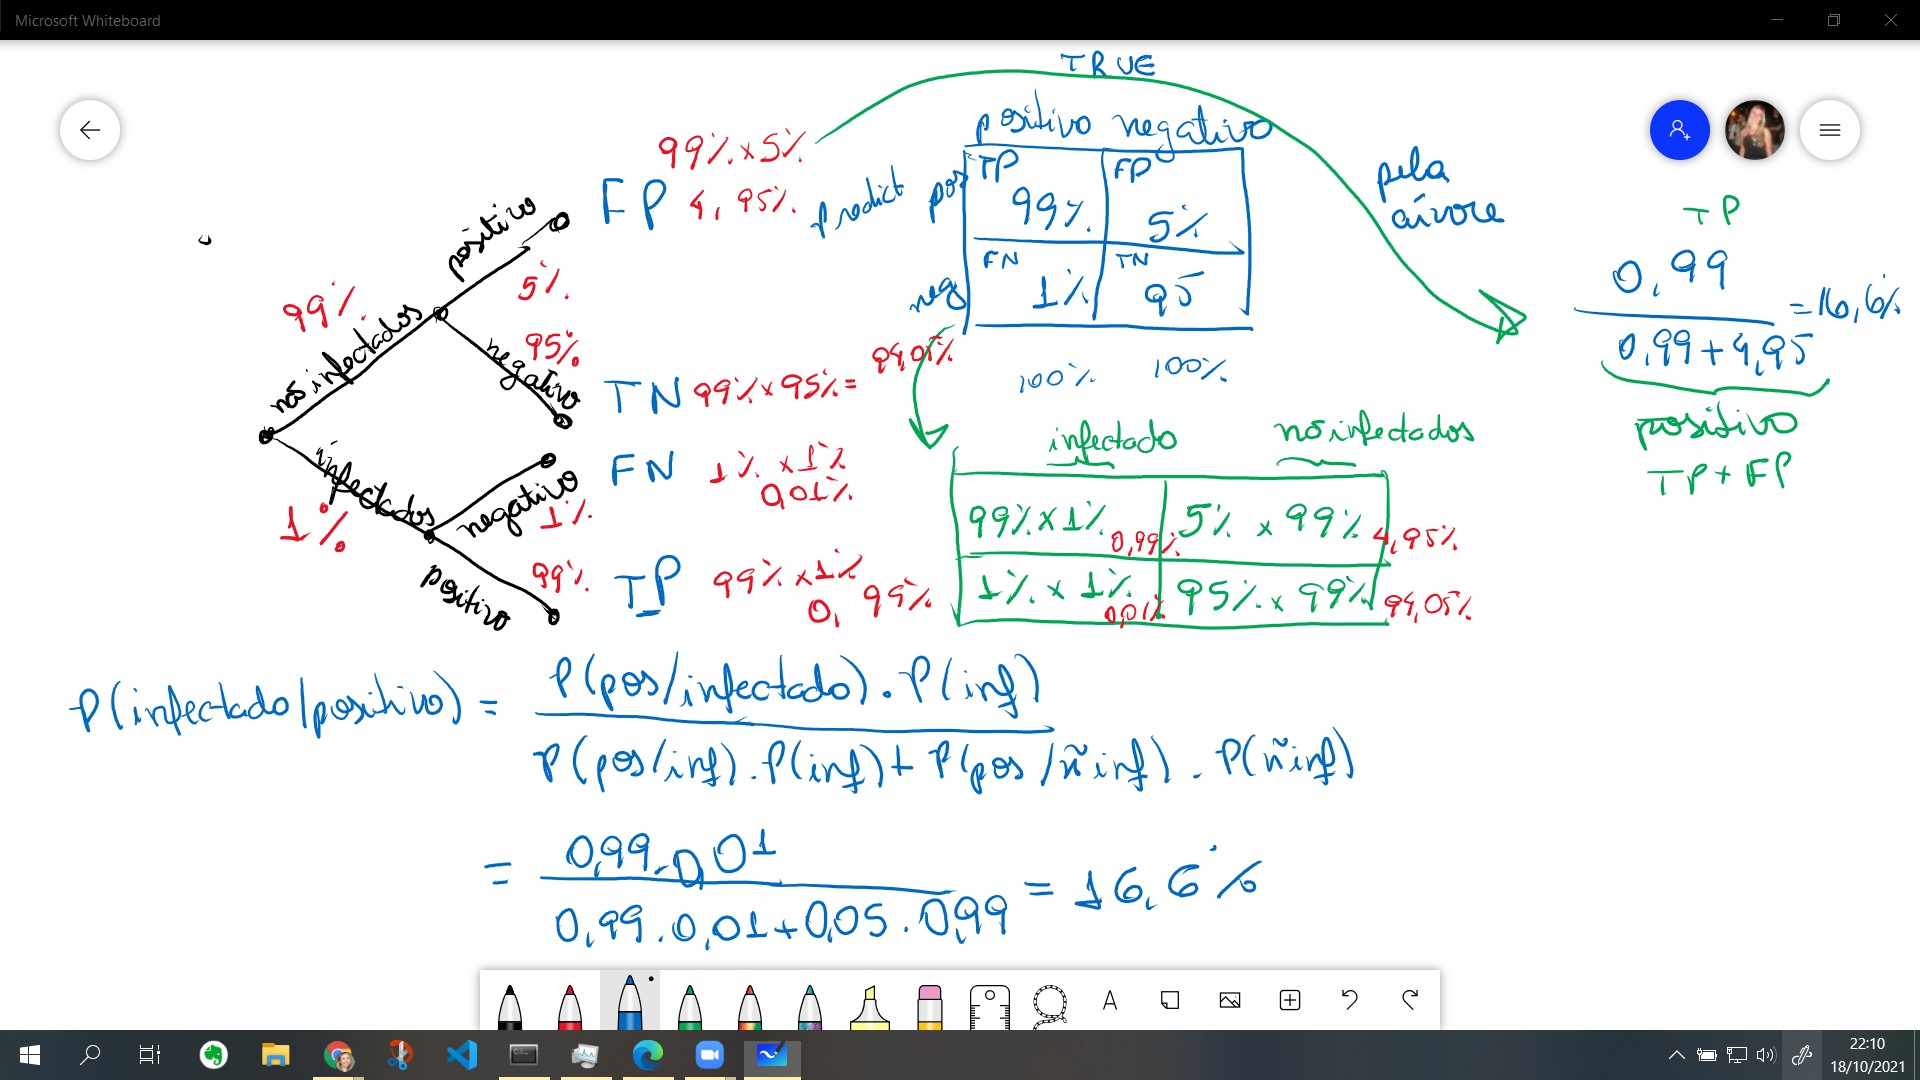
